# 🧠 Machine Learning Models - Evaluation Notebook
after exploring the data and preparing it for modeling,  
we will use our **pre-prepared functions** from `modeling_utils` such as:
- `data_split`
- `scaling`
- `train_eval_test`

These utilities were carefully designed to work in a **structured, clean, and generalizable way** across different modeling scenarios.  
## 1. Introduction
This notebook is designed to train and evaluate all models implemented in the project (Linear Regression, Ridge, KNN, XGBoost).  
Steps:  
1. Load the dataset  
2. Split into Train/Validation/Test  
3. Train each model  
4. Compare performance metrics  
   2,3,4 use `run_model_pipeline` 
5. Test the model with `test_model` 


------------------------------------------------------------------------

## import all libraries and file functions that we need

In [14]:
import sys
import os
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Allow Python to access the src folder
base_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(os.path.join(base_dir, "src"))

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from modeling_Utils.data_split import split_features_target
from modeling_Utils.scaling import scale_data
from modeling_Utils.train_eval_test import train_model, evaluate_model, print_metrics, test_model
from models.model_pipeline import run_model_pipeline
from data_Utils.Data_helper import load_data





------------------------------------------------------------------------

## 2. Load Dataset
We will use the `load_data` function from `Data_helper.py` to load the dataset.


In [9]:
train_df = load_data(r"G:\ML mostafa saad\slides\my work\13 Project 1 - Regression - Trip Duration Prediction\data\processed\train_processed_filtered.csv")
val_df   = load_data(r"G:\ML mostafa saad\slides\my work\13 Project 1 - Regression - Trip Duration Prediction\data\processed\val_processed.csv")
test_df  = load_data(r"G:\ML mostafa saad\slides\my work\13 Project 1 - Regression - Trip Duration Prediction\data\processed\test_processed.csv")

------------------------------------------------------------------------

# Now let's run the base model (LR)

In [10]:
model = LinearRegression(fit_intercept=True)
scaler_type = "minmax"
target_col = "log_trip_duration"

trained_model, scaler, metrics, y_train_pred, y_val_pred = run_model_pipeline(
    train_df=train_df,
    val_df=val_df,
    target_col=target_col,
    model=model,
    scaler_type=scaler_type
)
# =================== PRINT METRICS ===================
print("=== TRAIN & VAL METRICS FOR LR MODEL ===")
print_metrics(metrics) 

# =================== TEST ===================
test_df, test_metrics = test_model(trained_model, scaler, test_df, target_col=target_col)
print_metrics(test_metrics)

=== TRAIN & VAL METRICS FOR LR MODEL ===
Train Metrics:
  MAE: 0.2245
  RMSE: 0.3478
  R2: 0.7829

Val Metrics:
  MAE: 0.2257
  RMSE: 0.3525
  R2: 0.7796

Test Metrics:
  MAE: 0.2251
  RMSE: 0.3504
  R2: 0.7811



### 🔎 Linear Regression - Observations
- **Train R² = 0.7829, Val R² = 0.7796, Test R² = 0.7811**
  → The model explains around **78% of the variance**, which is decent but not perfect.
- **MAE ~0.225 and RMSE ~0.35** on all sets → the errors are consistent, meaning the model generalizes well.
- Performance is stable (no big gap between Train/Val/Test), but the linear assumption limits accuracy.
📌 LR works as a good baseline but struggles to capture non-linear relationships.


as we saw the LR model sucsseded to get a very resonablr R2 for train , val , and even test 
that means that the was no overfitting and it generalizes well on unseen data

------------------------------------------------------------------------

###  Ridge

In [11]:
ridge_model = Ridge(alpha=1, fit_intercept=True)
scaler_type = "minmax"
target_col = "log_trip_duration"

trained_model, scaler, metrics, y_train_pred, y_val_pred = run_model_pipeline(
    train_df=train_df,
    val_df=val_df,
    target_col=target_col,
    model=ridge_model,
    scaler_type=scaler_type
)

# =================== PRINT METRICS ===================
print("=== TRAIN & VAL METRICS FOR RIDGE MODEL ===")
print_metrics(metrics)

# =================== TEST ===================
test_df, test_metrics = test_model(trained_model, scaler, test_df, target_col=target_col)
print("=== TEST METRICS FOR RIDGE MODEL ===")
print_metrics(test_metrics)


=== TRAIN & VAL METRICS FOR RIDGE MODEL ===
Train Metrics:
  MAE: 0.2257
  RMSE: 0.3492
  R2: 0.7811

Val Metrics:
  MAE: 0.2271
  RMSE: 0.3544
  R2: 0.7771

=== TEST METRICS FOR RIDGE MODEL ===
Test Metrics:
  MAE: 0.2266
  RMSE: 0.3525
  R2: 0.7785



### 🔎 Ridge Regression - Observations
- **R² values (Train=0.7811, Val=0.7771, Test=0.7785)** → very close to LR.
- Errors (MAE ~0.226, RMSE ~0.35) are almost the same as LR.
- The small difference means **regularization didn’t help much** here, likely because the dataset doesn’t suffer from high variance or extreme multicollinearity.
📌 Ridge gives stability but doesn’t significantly outperform LR in this dataset.


------------------------------------------------------------------------

###  K-Nearest Neighbors (KNN)


In [12]:
knn_model = KNeighborsRegressor(
    n_neighbors=5,
    weights='distance',
    p=2  # Euclidean
)
scaler_type = "minmax"  # very important for KNN
target_col = "log_trip_duration"

trained_model, scaler, metrics, y_train_pred, y_val_pred = run_model_pipeline(
    train_df=train_df,
    val_df=val_df,
    target_col=target_col,
    model=knn_model,
    scaler_type=scaler_type
)

# =================== PRINT METRICS ===================
print("=== TRAIN & VAL METRICS FOR KNN MODEL ===")
print_metrics(metrics)

# =================== TEST ===================
test_df, test_metrics = test_model(trained_model, scaler, test_df, target_col=target_col)
print("=== TEST METRICS FOR KNN MODEL ===")
print_metrics(test_metrics)


=== TRAIN & VAL METRICS FOR KNN MODEL ===
Train Metrics:
  MAE: 0.0000
  RMSE: 0.0000
  R2: 1.0000

Val Metrics:
  MAE: 0.1135
  RMSE: 0.2291
  R2: 0.9069

=== TEST METRICS FOR KNN MODEL ===
Test Metrics:
  MAE: 0.1138
  RMSE: 0.2296
  R2: 0.9060



### 🔎 KNN - Observations
- **Train R² = 1.0, MAE = 0.0, RMSE = 0.0** → model is **overfitting perfectly on train**.
  - this happens because **KNN does not learn parameters** like Linear Regression or XGBoost.  
- Instead, KNN **stores all training samples** and uses them directly during prediction.  
- When predicting on a training sample, the closest neighbor is **the sample itself** → so the model outputs the exact value, resulting in **zero error on training**.
- **Validation/Test R² ~0.906** → much better than LR/Ridge, but clearly worse than XGBoost.
- **MAE ~0.113, RMSE ~0.229** → half the error of LR, which shows KNN captures non-linear patterns better.
📌 KNN is powerful but prone to overfitting. Still, it generalizes decently on this dataset.


------------------------------------------------------------------------


###  XGBoost


In [13]:
xgb_model = XGBRegressor(
    n_estimators=500,     
    learning_rate=0.05,
    max_depth=6,           
    subsample=0.8,         
    colsample_bytree=0.8,  
    random_state=42,
    n_jobs=-1
)

scaler_type = "minmax"  
target_col = "log_trip_duration"

trained_model, scaler, metrics, y_train_pred, y_val_pred = run_model_pipeline(
    train_df=train_df,
    val_df=val_df,
    target_col=target_col,
    model=xgb_model,
    scaler_type=scaler_type
)

# =================== PRINT METRICS ===================
print("=== TRAIN & VAL METRICS FOR XGBOOST MODEL ===")
print_metrics(metrics)

# =================== TEST ===================
test_df, test_metrics = test_model(trained_model, scaler, test_df, target_col=target_col)
print("=== TEST METRICS FOR XGBOOST MODEL ===")
print_metrics(test_metrics)


=== TRAIN & VAL METRICS FOR XGBOOST MODEL ===
Train Metrics:
  MAE: 0.0069
  RMSE: 0.0290
  R2: 0.9985

Val Metrics:
  MAE: 0.0078
  RMSE: 0.0416
  R2: 0.9969

=== TEST METRICS FOR XGBOOST MODEL ===
Test Metrics:
  MAE: 0.0076
  RMSE: 0.0390
  R2: 0.9973



### 🔎 XGBoost - Observations
- **Train R² = 0.9985, Val R² = 0.9969, Test R² = 0.9973** → extremely high, explains almost all variance.
- **MAE ~0.007, RMSE ~0.04** → way lower than other models.
- Small gap between train and val shows **no major overfitting**, the model generalizes very well.
📌 XGBoost clearly dominates, capturing complex non-linear relationships and minimizing errors.


------------------------------------------------------------------------

## Visualise the results conclution

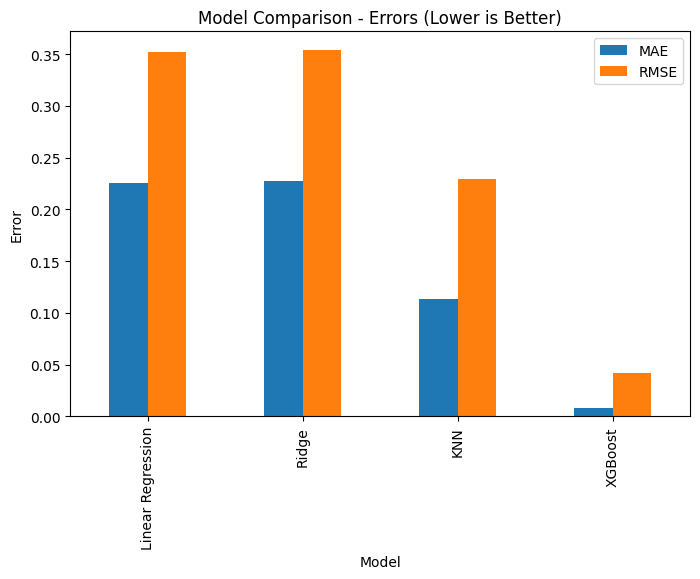

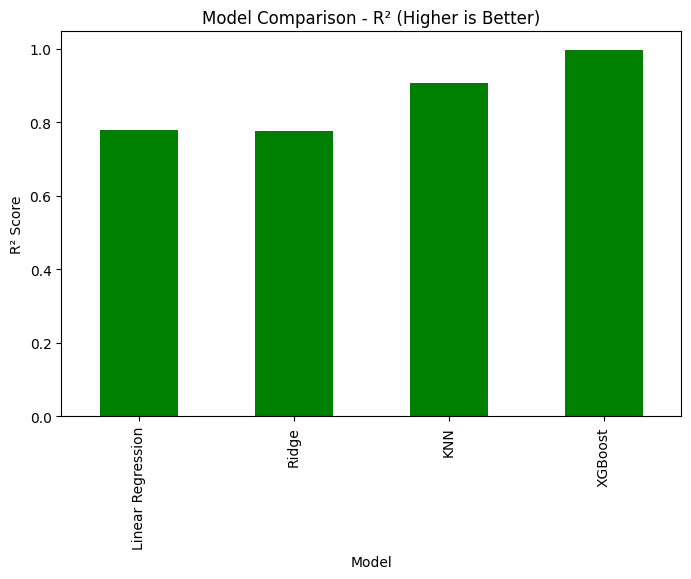

In [15]:
results = {
    "Model": ["Linear Regression", "Ridge", "KNN", "XGBoost"],
    "MAE": [0.2257, 0.2271, 0.1135, 0.0078],
    "RMSE": [0.3525, 0.3544, 0.2291, 0.0416],
    "R2": [0.7796, 0.7771, 0.9069, 0.9969]
}

results_df = pd.DataFrame(results)

# Bar chart comparison
results_df.set_index("Model")[["MAE", "RMSE"]].plot(kind="bar", figsize=(8,5))
plt.title("Model Comparison - Errors (Lower is Better)")
plt.ylabel("Error")
plt.show()

results_df.set_index("Model")["R2"].plot(kind="bar", figsize=(8,5), color="green")
plt.title("Model Comparison - R² (Higher is Better)")
plt.ylabel("R² Score")
plt.show()

## 🎯 Conclusion

- **Linear Regression (R² ≈ 0.78)**  
  A good baseline model. It captures linear trends but struggles with non-linear patterns in the data. Errors are consistent across train/val/test, showing good generalization but limited accuracy.

- **Ridge Regression (R² ≈ 0.77)**  
  Very similar to Linear Regression. Regularization did not bring significant improvements because the dataset likely does not suffer from high variance or multicollinearity.

- **KNN (R² ≈ 0.90)**  
  Performs much better than Linear/Ridge on validation/test. However, it **overfits perfectly on training data (R² = 1.0)** since it simply memorizes the training set. Still, it generalizes decently with much lower errors compared to LR/Ridge.

- **XGBoost (R² ≈ 0.997)**  
  By far the best model. It captures complex non-linear relationships with very low error. The small gap between training and validation shows it generalizes extremely well without major overfitting.

---

📌 **Final Notes:**
- **XGBoost is the most reliable choice** for this dataset.  
- **KNN** is strong but less efficient and prone to overfitting.  
- **Linear & Ridge** are useful baselines but clearly underperform compared to non-linear models.  
